In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
hr_data = pd.read_excel('HR_Processed_data.xlsx')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [173]:
hr_data_copy = hr_data.copy()

In [174]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [175]:
print(hr_data.department.unique())
print(hr_data.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


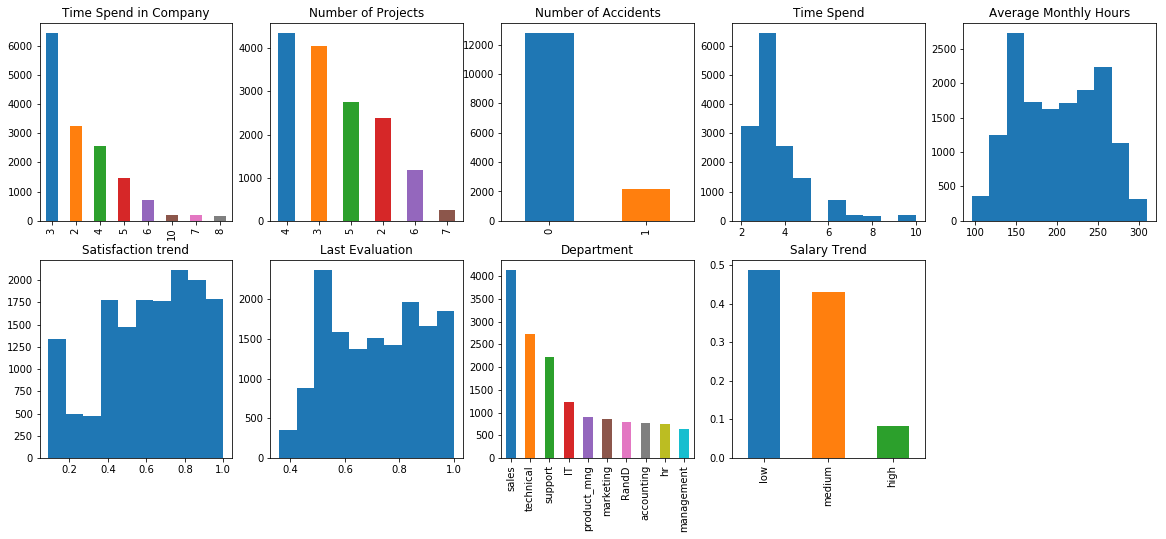

In [176]:
plt.figure(1)

plt.subplot(251)
hr_data['time_spend_company'].value_counts().plot(kind = 'bar', figsize = (20,8), title = 'Time Spend in Company')

plt.subplot(252)
hr_data['number_project'].value_counts().plot(kind = 'bar', figsize = (20,8), title = 'Number of Projects')

plt.subplot(253)
hr_data['Work_accident'].value_counts().plot(kind = 'bar', figsize = (20,8), title = 'Number of Accidents')

plt.subplot(254)
plt.title('Time Spend')
plt.hist(hr_data['time_spend_company'])

plt.subplot(255)
plt.title('Average Monthly Hours')
plt.hist(hr_data['average_montly_hours'])

plt.subplot(256)
plt.title('Satisfaction trend')
plt.hist(hr_data['satisfaction_level'])

plt.subplot(257)
plt.title('Last Evaluation')
plt.hist(hr_data['last_evaluation'])

plt.subplot(258)
hr_data['department'].value_counts(normalize = False).plot(kind = 'bar', figsize = (20,8), title = 'Department')

plt.subplot(259)
hr_data['salary'].value_counts(normalize = True).plot(kind = 'bar', figsize = (20,8), title = 'Salary Trend')

plt.show()

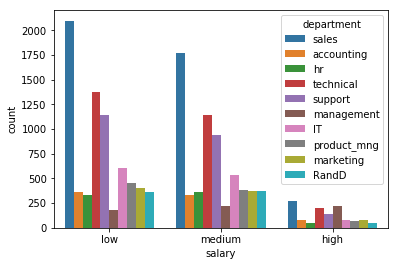

In [177]:
sns.countplot(x = 'salary', hue = 'department', data = hr_data)

In [178]:
hr_data_copy.salary = hr_data_copy.salary.astype('category')
hr_data_copy.salary = hr_data_copy.salary.cat.reorder_categories(['low', 'medium', 'high'])
hr_data_copy.salary = hr_data_copy.salary.cat.codes

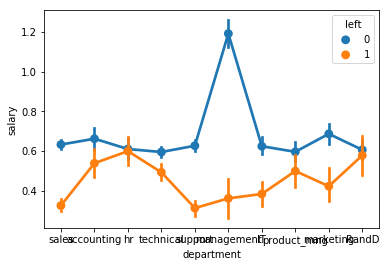

In [179]:
sns.pointplot(x = 'department', y='salary', hue='left', data = hr_data_copy)

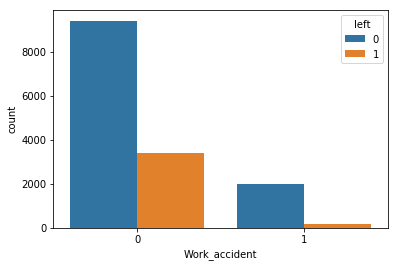

In [180]:
sns.countplot(x='Work_accident', hue='left', data = hr_data)

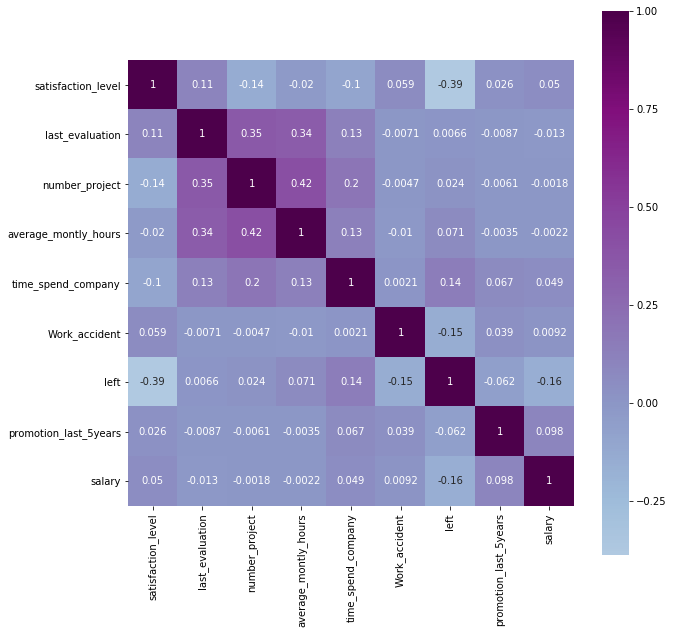

In [181]:
matrix = hr_data_copy.corr()

f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(matrix, square = True, center = 0, annot = True, cmap="BuPu")

In [182]:
valuable_employees = hr_data_copy[(hr_data['last_evaluation'] >= 0.75) & (hr_data['time_spend_company'] >= 4) & (hr_data['number_project'] >= 5)]
len(valuable_employees)

1919

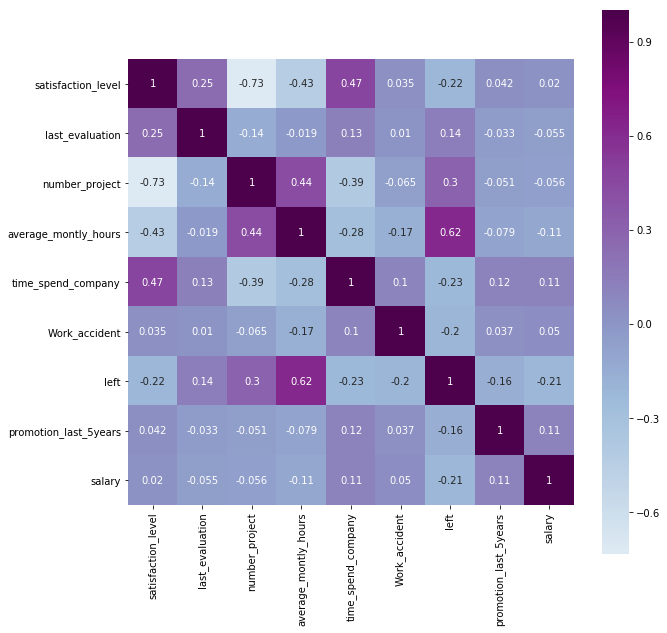

In [183]:
valuable_matrix = valuable_employees.corr()

f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(valuable_matrix, square = True, center = 0, annot = True, cmap="BuPu")

### Boxplot (Time Spent in Company vs Salary)

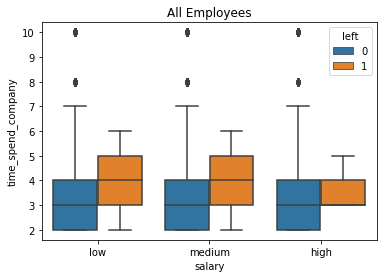

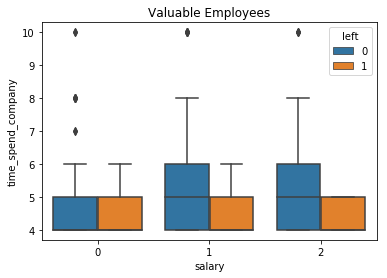

In [184]:
plt.title('All Employees')
sns.boxplot(x='salary',y='time_spend_company', data=hr_data, hue='left')
plt.figure(figsize = (8,10))
plt.show()

plt.title('Valuable Employees')
sns.boxplot(x='salary',y='time_spend_company', data=valuable_employees, hue='left')
plt.figure(figsize = (8,10))
plt.show()

From the Boxplot it is clear that in the list of valuable employees, experienced people are leaving more in number, in the Low and Medium Salary class

### Boxplot (Satisfaction Level in Company vs Salary)

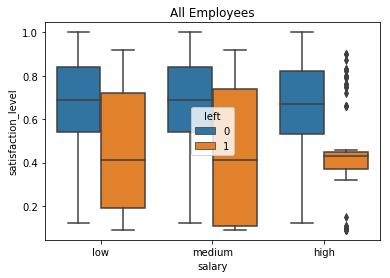

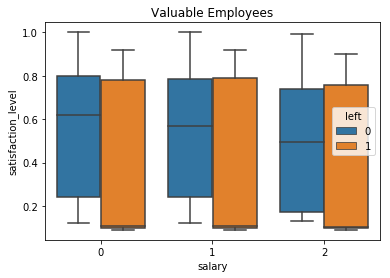

In [185]:
plt.title('All Employees')
sns.boxplot(x='salary', y='satisfaction_level', data=hr_data, hue='left')
plt.show()

plt.title('Valuable Employees')
sns.boxplot(x='salary',y='satisfaction_level', data=valuable_employees, hue='left')
plt.show()

Average satisfaction of the employees who left is less than the ones who stayed

### Boxplot (Average Monthly Hours vs Time Spent in the Company)

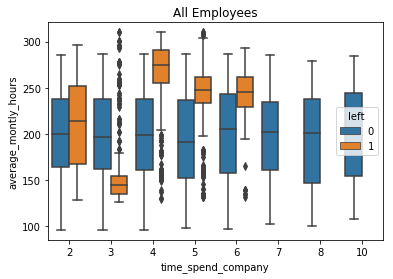

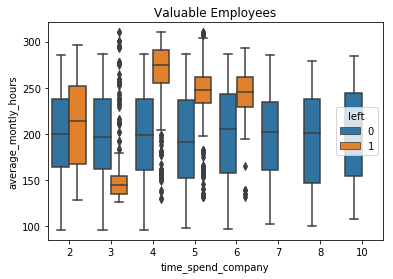

In [186]:
plt.title('All Employees')
sns.boxplot(x='time_spend_company', y='average_montly_hours', data=hr_data, hue='left')
plt.show()

plt.title('Valuable Employees')
sns.boxplot(x='time_spend_company', y='average_montly_hours', data=hr_data, hue='left')
plt.show()

In the list of valuable employees, the ones who left had spent more working hours on average.

In [187]:
hr_data_copy.department = hr_data_copy.department.astype('category')
hr_data_copy.department = hr_data_copy.department.cat.reorder_categories(['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD'])
hr_data_copy.department = hr_data_copy.department.cat.codes

In [188]:
departments = pd.get_dummies(hr_data_copy.department, prefix='department', prefix_sep='_', drop_first=True)
hr_data_copy  = hr_data_copy.drop('department', axis = 1)
hr_data_copy = hr_data_copy.join(departments)

In [189]:
salaries = pd.get_dummies(hr_data_copy.salary, prefix='salary', prefix_sep='_', drop_first=True)
hr_data_copy  = hr_data_copy.drop('salary', axis = 1)
hr_data_copy = hr_data_copy.join(salaries)

In [191]:
hr_data_copy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_1,department_2,department_3,department_4,department_5,department_6,department_7,department_8,department_9,salary_1,salary_2
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0
